# Classification - Linear

In [108]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg

In [109]:
file1path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/LS_Group22/Class1.txt"
file2path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/LS_Group22/Class2.txt"
file3path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/LS_Group22/Class3.txt"

In [121]:
def readdata(file1path, file2path, file3path):
    
    class1 = pd.read_csv(file1path, header=None, delimiter=" ")
    class2 = pd.read_csv(file2path, header=None, delimiter=" ")
    class3 = pd.read_csv(file3path, header=None, delimiter=" ")
    
    return class1, class2, class3

In [146]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [143]:
def plotplots(class1, class2, class3):
    
    plt.scatter(class1[0], class1[1])
    plt.scatter(class2[0], class2[1])
    plt.scatter(class3[0], class3[1])
    plt.legend(['Class 1','Class 2','Class 3'])
    plt.title("Input Data")
    plt.show()

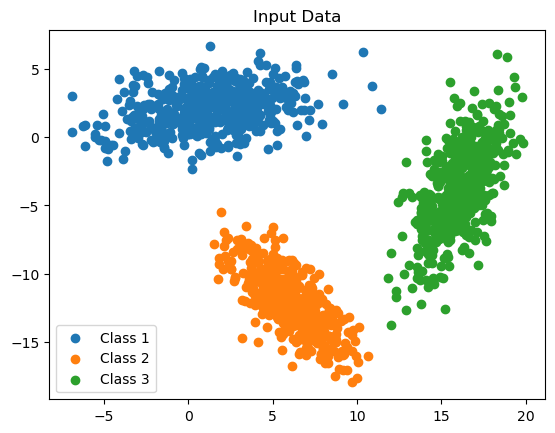

In [435]:
training1, validation1, test1 = split_data(class1)
training2, validation2, test2 = split_data(class2)
training3, validation3, test3 = split_data(class3)

class1, class2, class3 = readdata(file1path, file2path, file3path)

plotplots(class1, class2, class3)

### Data Training

In [140]:
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

In [569]:
def train_data(xn, k):
    
    m, n = xn.shape
    w = np.array([0.12, 0.12, 0.12])
    #print(k, xn)
    err = []
    avg_err = []
    epoch = 100
    
    while(epoch):

        for i in range(m):

            xi = [1, xn.iloc[i, 0], xn.iloc[i, 1]]
            an = np.dot(w.T, xi) #activation function

            sn = sigmoid(an)

            if i<k:
                yn = 0
            else:
                yn = 1

            error = 0.5*(yn-sn)**2
            eta = 0.4
            err.append(error)

            del_w = eta*(yn-sn)*sn*(1-sn)
            del_w = np.dot(del_w, xi)
            #print(del_w, xi)
            w = w + del_w

        error_avg = sum(err)/len(err)
        avg_err.append(error_avg)
        
        epoch = epoch-1
    
    print("Updated weight: ", w)
    print("Average Error: ", round(error_avg, 5))
    
    return w, avg_err

In [570]:
class12T = training1.append(training2, ignore_index=True)
m, n = data.shape
w, avg_err = train_data(class12T, len(training1))

Updated weight:  [-4.9391567   0.1178741  -1.15225183]
Average Error:  0.00017


### Data Validation & Testing 

In [379]:
def validation(xn, w):
    
    m, n = xn.shape
    yp = []
    
    for i in range(m):
        xi = [1, xn.iloc[i, 0], xn.iloc[i, 1]]
        an = np.dot(w.T, xi)
        yi = sigmoid(an)
        yp.append(yi)

    return yp

In [552]:
def decision_boundary(all_points, data, w):
    
    c1x, c2x, c1y, c2y = [], [], [], []  
    c1x_, c2x_, c1y_, c2y_ = [], [], [], []
    
    
    yp = validation(data, w)
    m, n = data.shape

    for i in range(m):
        if yp[i]>= 0.5:
            c1x.append(data.iloc[i, 0])
            c1y.append(data.iloc[i, 1])
        else:
            c2x.append(data.iloc[i, 0])
            c2y.append(data.iloc[i, 1])
         
    plt.scatter(c1x, c1y)
    plt.scatter(c2x, c2y)
    plt.legend(['Class 1','Class 2'])
    plt.title("Clustered Class")
    plt.savefig("/Users/rajeshr/Desktop/"+str(w[1])+".png")
    plt.show()
    
    yp = validation(all_points, w)
    m, n = all_points.shape

    for i in range(m):
        if yp[i]>= 0.5:
            c1x_.append(all_points.iloc[i, 0])
            c1y_.append(all_points.iloc[i, 1])
        else:
            c2x_.append(all_points.iloc[i, 0])
            c2y_.append(all_points.iloc[i, 1])

    plt.scatter(c1x_, c1y_, marker='s', s=500)
    plt.scatter(c2x_, c2y_, marker='s', s=500)
    plt.legend(['Class 1','Class 2'])
    plt.scatter(c1x, c1y, edgecolors='white')
    plt.scatter(c2x, c2y, edgecolors='white')

    plt.title("Decision Boundary")
    plt.tight_layout()
    plt.savefig("/Users/rajeshr/Desktop/"+str(w[0])+".png")
    plt.show()
    

#### Some Data Processing for Plotting

In [463]:
max_x_val = int(max([max(class1.iloc[0]), max(class2.iloc[0]), max(class3.iloc[0])]))
min_x_val = int(min([min(class1.iloc[0]), min(class2.iloc[0]), min(class3.iloc[0])]))
max_y_val = int(max([max(class1.iloc[1]), max(class2.iloc[1]), max(class3.iloc[1])]))
min_y_val = int(min([min(class1.iloc[1]), min(class2.iloc[1]), min(class3.iloc[1])]))

In [464]:
all_points = []
for i in range(min_x_val-5, max_x_val+5):
    for j in range(min_y_val-5, max_y_val+5):
        all_points.append([i, j])
        

all_points = pd.DataFrame(all_points)     
#all_points

# TRAINING DATA

# Training class 1 and class 2

In [595]:
class12Tr = training1.append(training2, ignore_index=True)
w1, avg_err1 = train_data(class12Tr, len(training1))

Updated weight:  [-4.9391567   0.1178741  -1.15225183]
Average Error:  0.00017


# Training class 1 and class 3

In [596]:
class13Tr = training1.append(training3, ignore_index=True)
w2, avg_err2 = train_data(class13Tr, len(training1))

Updated weight:  [-6.75386989  0.7999185  -0.46777134]
Average Error:  0.00037


# Training class 2 and class 3

In [597]:
class23Tr = training2.append(training3, ignore_index=True)
w3, avg_err3 = train_data(class23Tr, len(training2))

Updated weight:  [-0.11908258  1.82712259  1.75518477]
Average Error:  0.00022


# RESULTS

# Average error vs epoch Plots

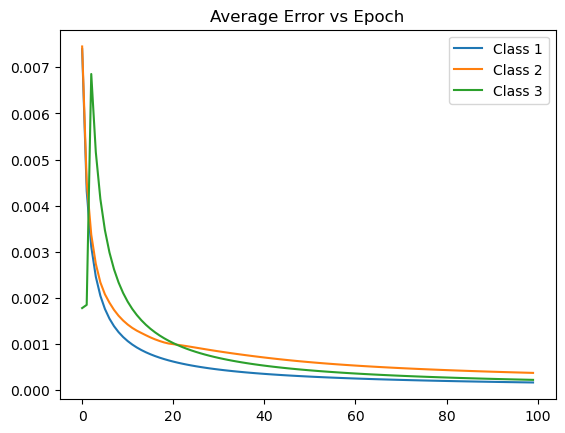

In [579]:
plt.plot(avg_err1)
plt.plot(avg_err2)
plt.plot(avg_err3)
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.title("Average Error vs Epoch")
plt.show()

# Decision Boundaries

### Plotting of validation data (Class 1 vs Class 2)

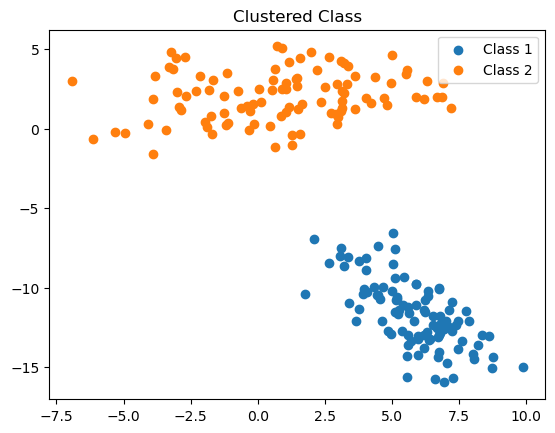

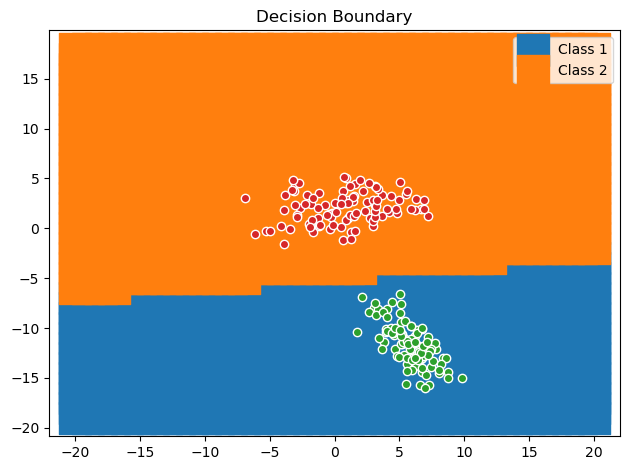

In [598]:
class12V = validation1.append(validation2, ignore_index=True)

#yp = validation(class12V, w1)
#plotting_classified_data(class12V, yp)

#yp = validation(all_points, w1)
decision_boundary(all_points, class12V, w1)

### Plotting of Testing data (Class 1 vs Class 2)

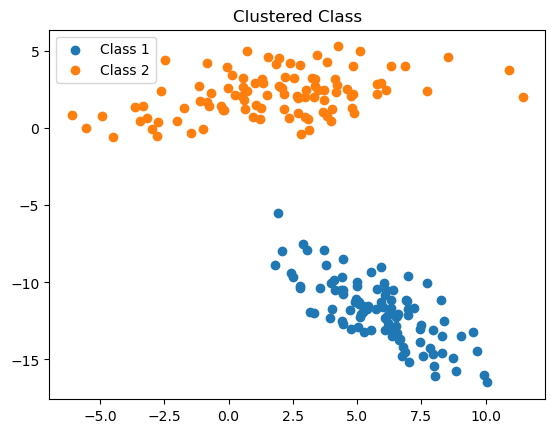

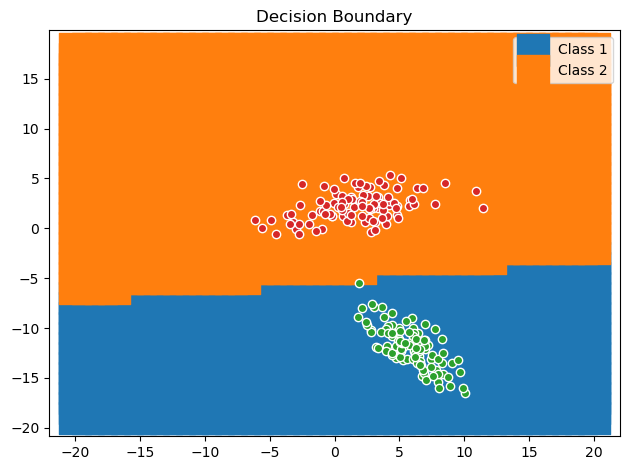

In [599]:
class12T = test1.append(test2, ignore_index=True)
decision_boundary(all_points, class12T, w1)

### Plotting of validation data (Class 1 vs Class 3)

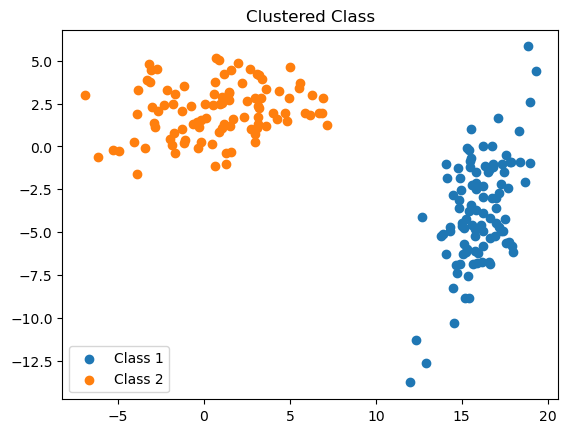

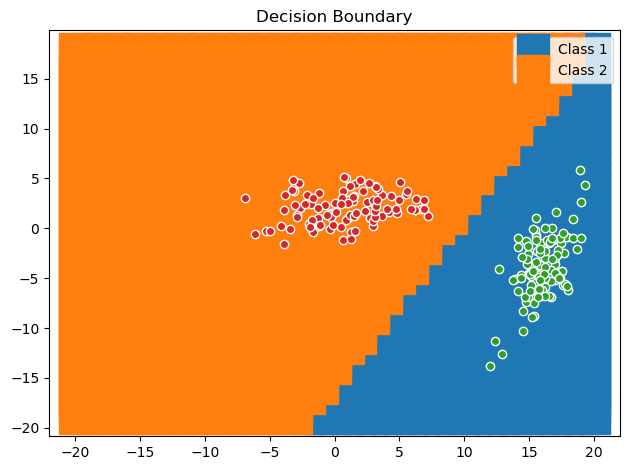

In [600]:
class13V = validation1.append(validation3, ignore_index=True)
decision_boundary(all_points, class13V, w2)

### Plotting of Testing data (Class 1 vs Class 3)

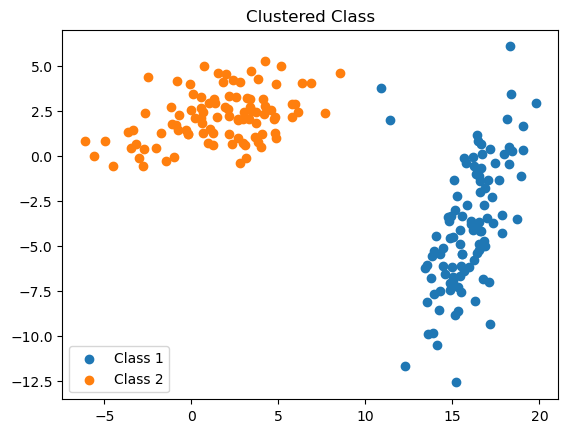

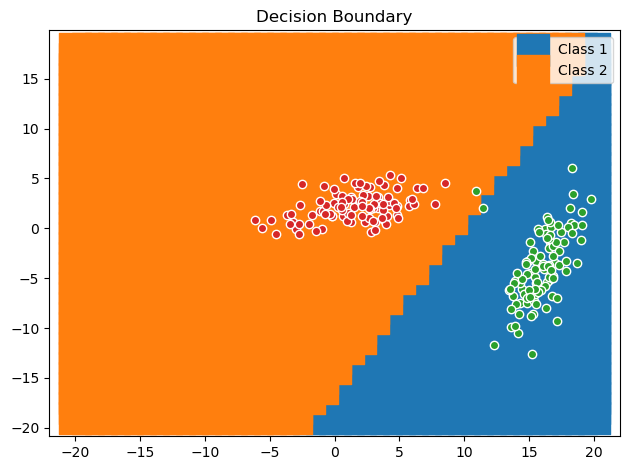

In [601]:
class13T = test1.append(test3, ignore_index=True)
decision_boundary(all_points, class13T, w2)

### Plotting of validation data (Class 2 vs Class 3)

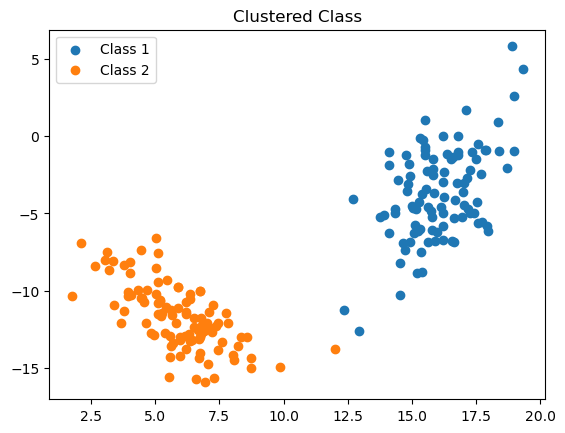

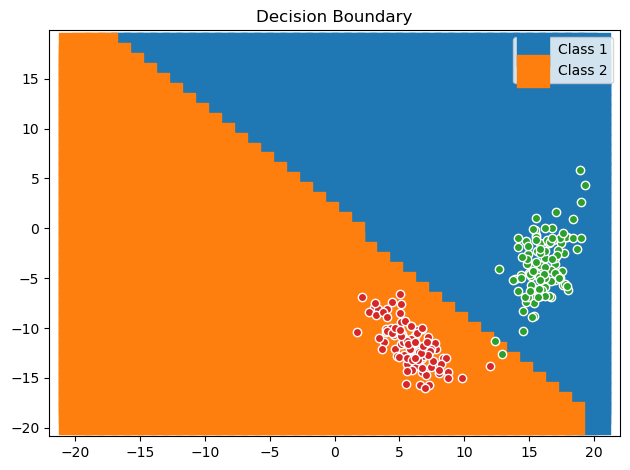

In [602]:
class23V = validation2.append(validation3, ignore_index=True)
decision_boundary(all_points, class23V, w3)

### Plotting of Testing data (Class 2 vs Class 3)

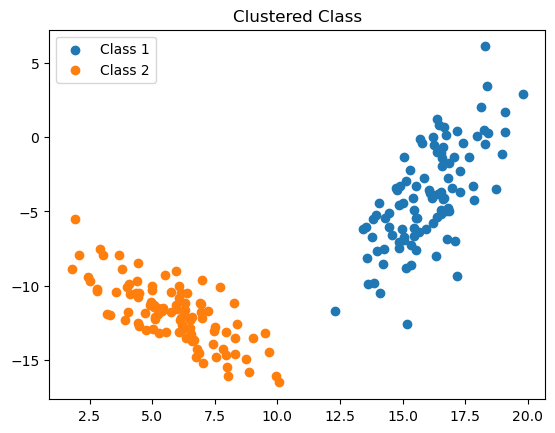

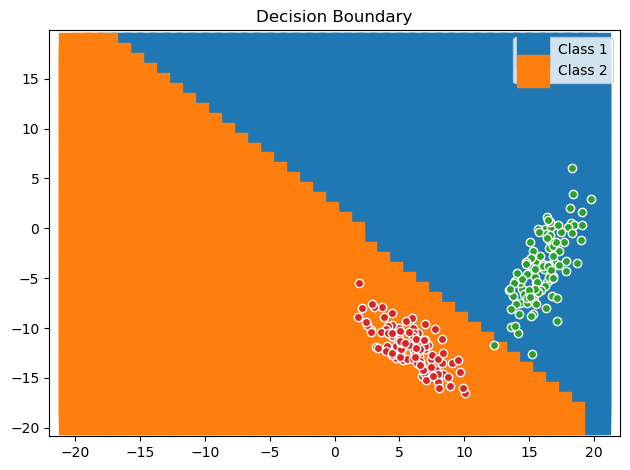

In [603]:
class23T = test2.append(test3, ignore_index=True)
decision_boundary(all_points, class23T, w3)

# Confusion Matrix and Classification Accuracy

In [616]:
def confusion_matrix(data, k1, k2):
    #k1 = len of class1 test data and k2 is for class2
    yp = validation(data, w1)
    c1, c2 = 0, 0
    for i in range(len(yp)):
        if yp[i] > 0.5:
            c1 += 1
        else:
            c2 += 1
    print(k1, k2, c1, c2)
    return c1, c2, k1-c1, k2-c2

### With reference to class 1

In [618]:
k1 = len(test1)
k2 = len(test2)
c11, c22, c12, c21 = confusion_matrix(class12T, k1, k2)
print(c11, c22, c12, c21)

100 100 100 100
100 100 0 0


In [619]:
k1 = len(test1)
k2 = len(test3)
c11, c33, c13, c31 = confusion_matrix(class13T, k1, k2)
print(c11, c33, c13, c31)

100 100 68 132
68 132 32 -32


c11 c12 c13
c21 c22 c23
c31 c32 c33